# Assignment 2

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./05_src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 





### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model]() or a linear model like [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [Ridge Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html).
        - An advanced regressor of your choice (e.g., Bagging, Boosting, SVR, etc.). TIP: select a tree-based method such that it does not take too long to run SHAP further below. 

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Place the files in the ../../05_src/data/fires/ directory and load the appropriate file. 

In [1]:
# Load the libraries as required.

%load_ext dotenv
%dotenv 
import pandas as pd
import numpy as np

In [2]:
# Load data

columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Get X and Y

Create the features data frame and target data.

In [3]:
# Separating features and target
X = fires_dt.drop('area', axis=1)
y = fires_dt['area']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:", X.columns.tolist())

Features shape: (517, 12)
Target shape: (517,)

Feature columns: ['coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separating numerical and categorical columns
numerical_cols = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_cols = ['month', 'day']

preproc1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='drop'
)

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [5]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

log_transform_cols = ['ffmc', 'dmc', 'dc', 'isi', 'wind', 'rain']
regular_numerical_cols = ['coord_x', 'coord_y', 'temp', 'rh']
categorical_cols = ['month', 'day']

preproc2 = ColumnTransformer(
    transformers=[
        ('log_num', Pipeline([
            ('log', FunctionTransformer(np.log1p, validate=False)),
            ('scale', StandardScaler())
        ]), log_transform_cols),
        ('reg_num', StandardScaler(), regular_numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='drop'
)

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [6]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [7]:
# Pipeline A = preproc1 + baseline
pipeline_A = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', Ridge())
])

In [8]:
# Pipeline B = preproc2 + baseline
pipeline_B = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', Ridge())
])

In [9]:
# Pipeline C = preproc1 + advanced model
pipeline_C = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [10]:
# Pipeline D = preproc2 + advanced model
pipeline_D = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', RandomForestRegressor(random_state=42))
])


# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [12]:
# Defining parameter grids for each pipeline
param_grid_A = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

param_grid_B = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

param_grid_C = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [5, 10, None]
}

param_grid_D = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [5, 10, None]
}

In [13]:
# Creating GridSearchCV for each pipeline
grid_search_A = GridSearchCV(
    pipeline_A, 
    param_grid_A, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_B = GridSearchCV(
    pipeline_B, 
    param_grid_B, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_C = GridSearchCV(
    pipeline_C, 
    param_grid_C, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_D = GridSearchCV(
    pipeline_D, 
    param_grid_D, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43
)

In [15]:
# Fit all grid searches
print("Fitting Pipeline A (Simple preprocessing + Ridge)...")
grid_search_A.fit(X_train, y_train)
print("Best parameters: ", grid_search_A.best_params_, "\n")

print("Fitting Pipeline B (Advanced preprocessing + Ridge)...")
grid_search_B.fit(X_train, y_train)
print("Best parameters: ", grid_search_B.best_params_, "\n")

print("Fitting Pipeline C (Simple preprocessing + Random Forest)...")
grid_search_C.fit(X_train, y_train)
print("Best parameters: ", grid_search_C.best_params_, "\n")

print("Fitting Pipeline D (Advanced preprocessing + Random Forest)...")
grid_search_D.fit(X_train, y_train)
print("Best parameters: ", grid_search_D.best_params_, "\n")

Fitting Pipeline A (Simple preprocessing + Ridge)...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all

Best parameters:  {'regressor__alpha': 100.0} 

Fitting Pipeline B (Advanced preprocessing + Ridge)...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:  {'regressor__alpha': 100.0} 

Fitting Pipeline C (Simple preprocessing + Random Forest)...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all

Best parameters:  {'regressor__max_depth': 5, 'regressor__n_estimators': 100} 

Fitting Pipeline D (Advanced preprocessing + Random Forest)...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all

Best parameters:  {'regressor__max_depth': 5, 'regressor__n_estimators': 100} 



/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Evaluate

+ Which model has the best performance?

In [16]:
# Compare all pipelines
pipeline_results = {
    'Pipeline A (Simple + Ridge)': grid_search_A.best_score_,
    'Pipeline B (Advanced + Ridge)': grid_search_B.best_score_,
    'Pipeline C (Simple + RF)': grid_search_C.best_score_,
    'Pipeline D (Advanced + RF)': grid_search_D.best_score_
}

for name, score in sorted(pipeline_results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.4f}")
    
# Find the best overall pipeline
best_pipeline_name = max(pipeline_results, key=pipeline_results.get)
print(f"\nBest performing pipeline: {best_pipeline_name}")

Pipeline B (Advanced + Ridge): -2082.2993
Pipeline A (Simple + Ridge): -2114.5945
Pipeline D (Advanced + RF): -2616.1774
Pipeline C (Simple + RF): -2628.7397

Best performing pipeline: Pipeline B (Advanced + Ridge)


Pipeline B (Advanced preprocessing + Ridge regression) has the best performance!

# Export

+ Save the best performing model to a pickle file.

In [17]:
import pickle

# Saving the best model (Pipeline B) to a pickle file
best_model = grid_search_B.best_estimator_

with open('best_forest_fire_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Best model saved to 'best_forest_fire_model.pkl'")
print(f"Best model parameters: {grid_search_B.best_params_}")
print(f"Best CV score: {grid_search_B.best_score_:.4f}")

Best model saved to 'best_forest_fire_model.pkl'
Best model parameters: {'regressor__alpha': 100.0}
Best CV score: -2082.2993


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [18]:
import shap
import matplotlib.pyplot as plt

# Initializing SHAP explainer for the best model
best_model = grid_search_B.best_estimator_
explainer = shap.explainers.Linear(best_model.named_steps['regressor'], 
                                 best_model.named_steps['preprocessing'].transform(X_train))


/Users/kiana/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Explaining prediction for test observation 9:
Actual area burned: 4.62 ha
Predicted area burned: 5.33 ha


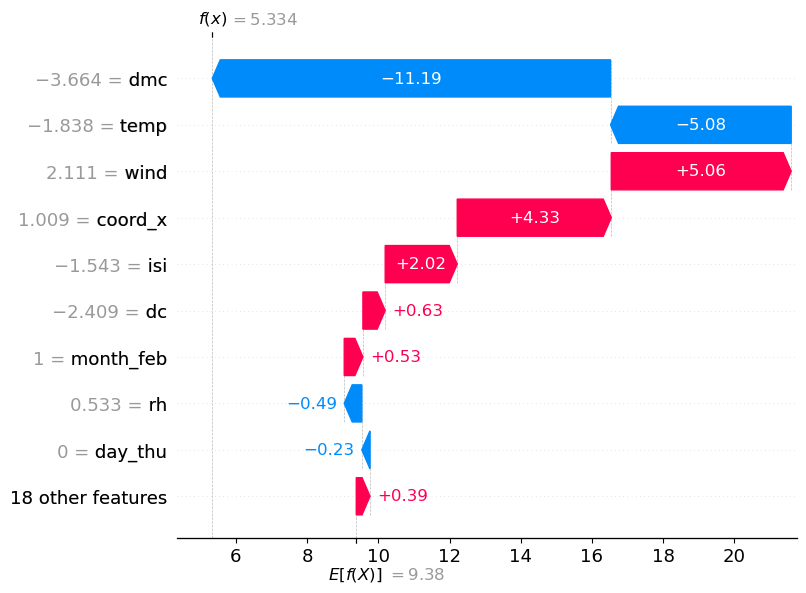

In [19]:
# Single observation

test_idx = 9
single_observation = X_test.iloc[[test_idx]]

print(f"Explaining prediction for test observation {test_idx}:")
print(f"Actual area burned: {y_test.iloc[test_idx]:.2f} ha")

prediction = best_model.predict(single_observation)
print(f"Predicted area burned: {prediction[0]:.2f} ha")

X_transformed = best_model.named_steps['preprocessing'].transform(single_observation)

shap_values_single = explainer(X_transformed).values

feature_names = (
    best_model.named_steps['preprocessing'].named_transformers_['log_num'].named_steps['scale'].get_feature_names_out().tolist()
    + best_model.named_steps['preprocessing'].named_transformers_['reg_num'].get_feature_names_out().tolist()
    + best_model.named_steps['preprocessing'].named_transformers_['cat'].get_feature_names_out().tolist()
)

shap.waterfall_plot(shap.Explanation(values=shap_values_single[0], 
                                     base_values=explainer.expected_value, 
                                     data=X_transformed[0],
                                     feature_names=feature_names))
plt.show()

DMC is the most important feature for explaining this observation's prediction, followed by temperature and wind.

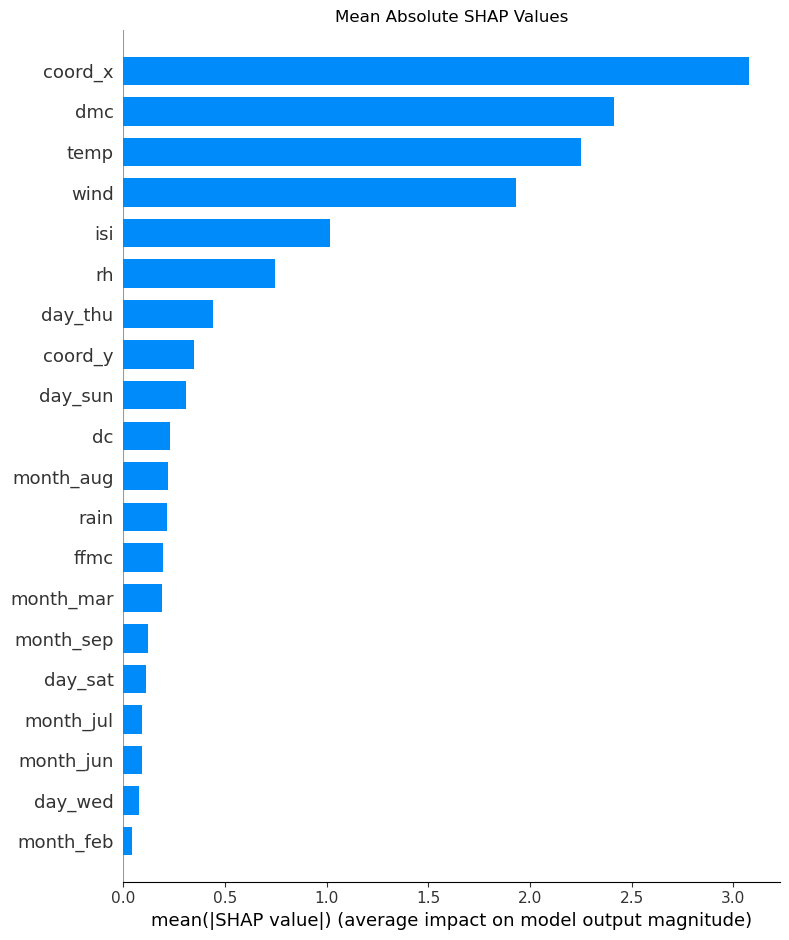

 1. coord_x              3.0755
 2. dmc                  2.4115
 3. temp                 2.2518
 4. wind                 1.9297
 5. isi                  1.0172
 6. rh                   0.7479
 7. day_thu              0.4425
 8. coord_y              0.3457
 9. day_sun              0.3080
10. dc                   0.2272
11. month_aug            0.2202
12. rain                 0.2129
13. ffmc                 0.1974
14. month_mar            0.1881
15. month_sep            0.1202
16. day_sat              0.1110
17. month_jul            0.0930
18. month_jun            0.0921
19. day_wed              0.0793
20. month_feb            0.0402
21. day_mon              0.0184
22. month_dec            0.0164
23. day_tue              0.0120
24. month_oct            0.0069
25. month_may            0.0038
26. month_jan            0.0026
27. month_nov            0.0001


In [20]:
# Across the complete training set

sample_size = min(500, len(X_train))
X_train_sample = X_train.sample(n=sample_size, random_state=44)
X_train_transformed = best_model.named_steps['preprocessing'].transform(X_train_sample)

shap_values_global = explainer.shap_values(X_train_transformed)

shap.summary_plot(shap_values_global, X_train_transformed, 
                 feature_names=feature_names, plot_type="bar", show=False)
plt.title("Mean Absolute SHAP Values")
plt.tight_layout()
plt.show()

mean_abs_shap = np.abs(shap_values_global).mean(axis=0)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': mean_abs_shap
}).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<20} {row['importance']:.4f}")

Across the complete training set, the most important features are the x-coordinate, DMC, temperature, and wind. The least important ones are whether the month is November, January, May, or October.

The one-hot values for month and day are all at the bottom of the importance list (except Thursday, Sunday, and August, which might be due to sampling noise). This makes sense also from an intuitive standpoint, since the climate effects from time of the year are already covered in the other features, and there's no reason to think the day of the week would matter significantly. I would remove these features from the model.

To test whether these features enhance the model performance, we could train a new model without these features, and compare the errors on the test split.

## Criteria

The [rubric](./assignment_2_rubric_clean.xlsx) contains the criteria for assessment.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at the `help` channel. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.